In [1]:
%cd ../..

/Users/heiko/PhD/Repos/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from combinators.inference import importance, mcmc
from combinators.kernel import kernel, mh
import combinators.model as model
from combinators import utils

In [3]:
import examples.ais.ais_1d_gaussians as ais_example
import examples.ais.image_density as image_density

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
from scipy.misc import imread
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt

img_ary = imread('examples/ais/probtorch-logo-bw.png', mode='L').astype(float)
img_ary = gaussian_filter(img_ary, sigma=1)

/Users/heiko/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


In [6]:
ANNEALING_STEPS = 50
BATCH_SHAPE = (1,)

In [7]:
T = 1000
annealed_points = torch.zeros((0, 2))
log_weights = torch.zeros((0))
for t in range(T):
    proposal = image_density.AnnealingProposal(image_density.ImageProposal(batch_shape=BATCH_SHAPE), ANNEALING_STEPS)
    target = model.Compose(image_density.ProbtorchLogoDensity(batch_shape=BATCH_SHAPE), proposal)
    ais = ais_example.annealed_importance(target, kernel.LinScaledGaussianKernel('ProbtorchLogoDensity.ImageProposal/ImageProposal', 'ImageProposal', scale=1.0, n_steps=50), moves=ANNEALING_STEPS)
    annealed_batch, trace, log_weight = ais(data={'image': torch.FloatTensor(img_ary)})

    for i in range(50):
        annealed_batch = annealed_batch[0]

    annealed_points = torch.cat((annealed_points, annealed_batch))
    log_weights = torch.cat((log_weights, log_weight))

In [8]:
%debug

03/08/2019 15:11:26 No traceback has been produced, nothing to debug.


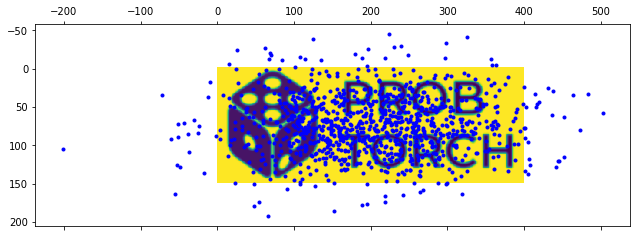

In [17]:
weights = log_weights.exp()
plt.matshow(img_ary)
plt.scatter(annealed_points[(weights <= .9).nonzero(), 0], annealed_points[(weights <= .9).nonzero(), 1], c='b', marker='.')
plt.scatter(annealed_points[(weights > .9).nonzero(), 0], annealed_points[(weights > .9).nonzero(), 1], c='b', marker='.')
plt.savefig('probtorch_logo_ais.pdf')

In [18]:
a = torch.tensor([[278.9529, 140.2809]])
torch.stack((a, a), dim=1)

tensor([[[278.9529, 140.2809],
         [278.9529, 140.2809]]])